# Measuring Learning Outcomes for Pretest and Postest

connectedness: checking if solutions are spanning or not
out of the connected, is_mst

optimality: check is_mst
how close was the solution to the correct solution quantified by the error

In [1]:
from justhink_problem.problem import init_problem, reset_problem
from justhink_problem.domain.state import WorldState
import pathlib as pl
import pickle
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Define paths.

In [2]:
processed_tables_pickle_file = pl.Path(
    '../processed_data/processed_tables.pickle')

# Load pickled data.

In [3]:
with processed_tables_pickle_file.open('rb') as handle:
    processed_tables = pickle.load(handle)

In [4]:
processed_tables.keys()

dict_keys([6, 1, 9, 7, 2, 5, 4, 3, 10])

# Cleaning tables.

In [5]:
# Getting the submission states only and dropping the duplicates, unnecessary columns, keep state, activity, imported info
def clean_tables():
    student_tables = {}
    for student, df in processed_tables.items():

        df = df.copy()
        df = df[df['is_submission']]

        df.drop(['Time', 'header.seq', 'state.edges', 'state.suggested.u', 'state.suggested.v', 'state.terminal', 'state.submit_suggested', 'action.type', 'action.edge.u', 'action.edge.v', 'turn_agent', 'next_state.edges', 'next_state.suggested.u', 'next_state.suggested.v',
                'next_state.terminal', 'next_state.submit_suggested', 'action_no', 'step_no'], axis=1, inplace=True)

        # removing duplicate rows from submission log
        df.drop_duplicates(subset="header.frame_id",
                           keep='first', inplace=True)

        # removing collaborative activity rows
        df = df[df['header.frame_id'] != "collab-activity"]
        df = df[df['header.frame_id'] != "collab-activity-2"]

        mst_costs = []
        spanning = []
        norm_error = []

        for i, row in df.iterrows():
            cost = row['world_state'].get_mst_cost()
            span = row['world_state'].is_spanning()
            mst_costs.append(cost)
            spanning.append(span)
            # compute normalized error
            if span:
                norm_error.append((int(row['cost']) - int(row['world_state'].get_mst_cost())) /
                                  int(row['world_state'].get_mst_cost()))
            else:
                norm_error.append(None)

        # adding mst_cost, spanning, and normalized_error columns
        df['mst_cost'] = mst_costs
        df['spanning'] = spanning
        df['normalized_error'] = norm_error

        student_tables[student] = df

        print("STUDENT", student)
        display(df)

    return student_tables


all_tables = clean_tables()

STUDENT 6


,header.frame_id,action.agent_name,world_state,is_submission,cost,is_mst,mst_cost,spanning,normalized_error
11,pretest-1,human,"WorldState(n:7,e:12|e:7,c:19,s:True,t:False)",True,19,False,15,True,0.266667
21,pretest-2,human,"WorldState(n:7,e:12|e:8,c:46,s:True,t:False)",True,46,False,30,True,0.533333
30,pretest-3,human,"WorldState(n:7,e:12|e:7,c:26,s:True,t:False)",True,26,False,21,True,0.238095
39,pretest-4,human,"WorldState(n:7,e:12|e:7,c:56,s:True,t:False)",True,56,False,45,True,0.244444
48,pretest-5,human,"WorldState(n:7,e:12|e:7,c:19,s:True,t:False)",True,19,False,15,True,0.266667
247,posttest-1,human,"WorldState(n:7,e:12|e:6,c:15,s:False,t:False)",True,15,False,15,False,NaN
256,posttest-2,human,"WorldState(n:7,e:12|e:7,c:38,s:True,t:False)",True,38,False,30,True,0.266667
265,posttest-3,human,"WorldState(n:7,e:12|e:7,c:26,s:True,t:False)",True,26,False,21,True,0.238095
274,posttest-4,human,"WorldState(n:7,e:12|e:7,c:53,s:True,t:False)",True,53,False,45,True,0.177778
282,posttest-5,human,"WorldState(n:7,e:12|e:6,c:16,s:True,t:False)",True,16,False,15,True,0.066667


STUDENT 1


,header.frame_id,action.agent_name,world_state,is_submission,cost,is_mst,mst_cost,spanning,normalized_error
11,pretest-1,human,"WorldState(n:7,e:12|e:7,c:23,s:True,t:False)",True,23,False,15,True,0.533333
20,pretest-2,human,"WorldState(n:7,e:12|e:7,c:38,s:True,t:False)",True,38,False,30,True,0.266667
29,pretest-3,human,"WorldState(n:7,e:12|e:6,c:22,s:True,t:False)",True,22,False,21,True,0.047619
37,pretest-4,human,"WorldState(n:7,e:12|e:6,c:45,s:True,t:False)",True,45,True,45,True,0.000000
45,pretest-5,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,True,15,True,0.000000
252,posttest-1,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,True,15,True,0.000000
260,posttest-2,human,"WorldState(n:7,e:12|e:6,c:30,s:True,t:False)",True,30,True,30,True,0.000000
268,posttest-3,human,"WorldState(n:7,e:12|e:6,c:21,s:True,t:False)",True,21,True,21,True,0.000000
276,posttest-4,human,"WorldState(n:7,e:12|e:6,c:45,s:True,t:False)",True,45,True,45,True,0.000000
284,posttest-5,human,"WorldState(n:7,e:12|e:6,c:16,s:True,t:False)",True,16,False,15,True,0.066667


STUDENT 9


,header.frame_id,action.agent_name,world_state,is_submission,cost,is_mst,mst_cost,spanning,normalized_error
13,pretest-1,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,True,15,True,0.000000
28,pretest-2,human,"WorldState(n:7,e:12|e:12,c:78,s:True,t:False)",True,78,False,30,True,1.600000
41,pretest-3,human,"WorldState(n:7,e:12|e:11,c:46,s:True,t:False)",True,46,False,21,True,1.190476
58,pretest-4,human,"WorldState(n:7,e:12|e:12,c:99,s:True,t:False)",True,99,False,45,True,1.200000
67,pretest-5,human,"WorldState(n:7,e:12|e:7,c:18,s:True,t:False)",True,18,False,15,True,0.200000
260,posttest-1,human,"WorldState(n:7,e:12|e:6,c:17,s:True,t:False)",True,17,False,15,True,0.133333
269,posttest-2,human,"WorldState(n:7,e:12|e:7,c:36,s:True,t:False)",True,36,False,30,True,0.200000
277,posttest-3,human,"WorldState(n:7,e:12|e:6,c:23,s:True,t:False)",True,23,False,21,True,0.095238
285,posttest-4,human,"WorldState(n:7,e:12|e:6,c:46,s:True,t:False)",True,46,False,45,True,0.022222
293,posttest-5,human,"WorldState(n:7,e:12|e:6,c:16,s:True,t:False)",True,16,False,15,True,0.066667


STUDENT 7


,header.frame_id,action.agent_name,world_state,is_submission,cost,is_mst,mst_cost,spanning,normalized_error
22,pretest-1,human,"WorldState(n:7,e:12|e:7,c:18,s:True,t:False)",True,18,False,15,True,0.2
30,pretest-2,human,"WorldState(n:7,e:12|e:6,c:30,s:True,t:False)",True,30,True,30,True,0.0
36,pretest-3,human,"WorldState(n:7,e:12|e:3,c:12,s:False,t:False)",True,12,False,21,False,NaN
40,pretest-4,human,"WorldState(n:7,e:12|e:2,c:14,s:False,t:False)",True,14,False,45,False,NaN
45,pretest-5,human,"WorldState(n:7,e:12|e:3,c:6,s:False,t:False)",True,6,False,15,False,NaN
184,posttest-1,human,"WorldState(n:7,e:12|e:3,c:6,s:False,t:False)",True,6,False,15,False,NaN
187,posttest-2,human,"WorldState(n:7,e:12|e:1,c:4,s:False,t:False)",True,4,False,30,False,NaN
191,posttest-3,human,"WorldState(n:7,e:12|e:2,c:6,s:False,t:False)",True,6,False,21,False,NaN
194,posttest-4,human,"WorldState(n:7,e:12|e:1,c:8,s:False,t:False)",True,8,False,45,False,NaN
199,posttest-5,human,"WorldState(n:7,e:12|e:3,c:6,s:False,t:False)",True,6,False,15,False,NaN


STUDENT 2


,header.frame_id,action.agent_name,world_state,is_submission,cost,is_mst,mst_cost,spanning,normalized_error
5,pretest-1,human,"WorldState(n:7,e:12|e:1,c:4,s:False,t:False)",True,4,False,15,False,NaN
24,pretest-2,human,"WorldState(n:7,e:12|e:7,c:48,s:True,t:False)",True,48,False,30,True,0.600000
33,pretest-3,human,"WorldState(n:7,e:12|e:7,c:27,s:True,t:False)",True,27,False,21,True,0.285714
51,pretest-4,human,"WorldState(n:7,e:12|e:7,c:54,s:True,t:False)",True,54,False,45,True,0.200000
61,pretest-5,human,"WorldState(n:7,e:12|e:8,c:22,s:True,t:False)",True,22,False,15,True,0.466667
187,posttest-1,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,True,15,True,0.000000
195,posttest-2,human,"WorldState(n:7,e:12|e:6,c:30,s:True,t:False)",True,30,True,30,True,0.000000
203,posttest-3,human,"WorldState(n:7,e:12|e:6,c:22,s:True,t:False)",True,22,False,21,True,0.047619
211,posttest-4,human,"WorldState(n:7,e:12|e:6,c:45,s:True,t:False)",True,45,True,45,True,0.000000
220,posttest-5,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,True,15,True,0.000000


STUDENT 5


,header.frame_id,action.agent_name,world_state,is_submission,cost,is_mst,mst_cost,spanning,normalized_error
21,pretest-1,human,"WorldState(n:7,e:12|e:8,c:22,s:True,t:False)",True,22,False,15,True,0.466667
30,pretest-2,human,"WorldState(n:7,e:12|e:7,c:38,s:True,t:False)",True,38,False,30,True,0.266667
39,pretest-3,human,"WorldState(n:7,e:12|e:7,c:25,s:True,t:False)",True,25,False,21,True,0.190476
55,pretest-4,human,"WorldState(n:7,e:12|e:8,c:62,s:True,t:False)",True,62,False,45,True,0.377778
64,pretest-5,human,"WorldState(n:7,e:12|e:7,c:18,s:True,t:False)",True,18,False,15,True,0.200000
249,posttest-1,human,"WorldState(n:7,e:12|e:7,c:19,s:True,t:False)",True,19,False,15,True,0.266667
257,posttest-2,human,"WorldState(n:7,e:12|e:6,c:30,s:False,t:False)",True,30,False,30,False,NaN
267,posttest-3,human,"WorldState(n:7,e:12|e:7,c:25,s:True,t:False)",True,25,False,21,True,0.190476
276,posttest-4,human,"WorldState(n:7,e:12|e:7,c:53,s:True,t:False)",True,53,False,45,True,0.177778
293,posttest-5,human,"WorldState(n:7,e:12|e:7,c:18,s:True,t:False)",True,18,False,15,True,0.200000


STUDENT 4


,header.frame_id,action.agent_name,world_state,is_submission,cost,is_mst,mst_cost,spanning,normalized_error
6,pretest-1,human,"WorldState(n:7,e:12|e:1,c:2,s:False,t:False)",True,2,False,15,False,NaN
19,pretest-2,human,"WorldState(n:7,e:12|e:11,c:68,s:True,t:False)",True,68,False,30,True,1.266667
27,pretest-3,human,"WorldState(n:7,e:12|e:6,c:26,s:True,t:False)",True,26,False,21,True,0.238095
35,pretest-4,human,"WorldState(n:7,e:12|e:6,c:50,s:True,t:False)",True,50,False,45,True,0.111111
43,pretest-5,human,"WorldState(n:7,e:12|e:6,c:20,s:True,t:False)",True,20,False,15,True,0.333333
262,posttest-1,human,"WorldState(n:7,e:12|e:7,c:18,s:True,t:False)",True,18,False,15,True,0.200000
273,posttest-2,human,"WorldState(n:7,e:12|e:7,c:42,s:True,t:False)",True,42,False,30,True,0.400000
284,posttest-3,human,"WorldState(n:7,e:12|e:7,c:28,s:True,t:False)",True,28,False,21,True,0.333333
294,posttest-4,human,"WorldState(n:7,e:12|e:8,c:68,s:True,t:False)",True,68,False,45,True,0.511111
303,posttest-5,human,"WorldState(n:7,e:12|e:7,c:20,s:True,t:False)",True,20,False,15,True,0.333333


STUDENT 3


,header.frame_id,action.agent_name,world_state,is_submission,cost,is_mst,mst_cost,spanning,normalized_error
10,pretest-1,human,"WorldState(n:7,e:12|e:6,c:16,s:True,t:False)",True,16,False,15,True,0.066667
18,pretest-2,human,"WorldState(n:7,e:12|e:6,c:32,s:True,t:False)",True,32,False,30,True,0.066667
26,pretest-3,human,"WorldState(n:7,e:12|e:6,c:22,s:True,t:False)",True,22,False,21,True,0.047619
41,pretest-4,human,"WorldState(n:7,e:12|e:6,c:46,s:True,t:False)",True,46,False,45,True,0.022222
49,pretest-5,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,True,15,True,0.000000
237,posttest-1,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,True,15,True,0.000000
245,posttest-2,human,"WorldState(n:7,e:12|e:6,c:30,s:True,t:False)",True,30,True,30,True,0.000000
253,posttest-3,human,"WorldState(n:7,e:12|e:6,c:21,s:True,t:False)",True,21,True,21,True,0.000000
261,posttest-4,human,"WorldState(n:7,e:12|e:6,c:45,s:True,t:False)",True,45,True,45,True,0.000000
269,posttest-5,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,True,15,True,0.000000


STUDENT 10


,header.frame_id,action.agent_name,world_state,is_submission,cost,is_mst,mst_cost,spanning,normalized_error
10,pretest-1,human,"WorldState(n:7,e:12|e:6,c:16,s:True,t:False)",True,16,False,15,True,0.066667
28,pretest-2,human,"WorldState(n:7,e:12|e:7,c:38,s:True,t:False)",True,38,False,30,True,0.266667
46,pretest-3,human,"WorldState(n:7,e:12|e:6,c:21,s:True,t:False)",True,21,True,21,True,0.000000
54,pretest-4,human,"WorldState(n:7,e:12|e:6,c:45,s:True,t:False)",True,45,True,45,True,0.000000
62,pretest-5,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,True,15,True,0.000000
130,posttest-1,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,True,15,True,0.000000
140,posttest-2,human,"WorldState(n:7,e:12|e:6,c:30,s:True,t:False)",True,30,True,30,True,0.000000
148,posttest-3,human,"WorldState(n:7,e:12|e:6,c:22,s:True,t:False)",True,22,False,21,True,0.047619
156,posttest-4,human,"WorldState(n:7,e:12|e:6,c:45,s:True,t:False)",True,45,True,45,True,0.000000
164,posttest-5,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,True,15,True,0.000000


# Compute spanning, mst, and average error scores.

In [6]:
# caculate spanning score for pretest and postest
def compute_spanning_score(df):
    pre_spanning_score = 0
    post_spanning_score = 0
    for index, row in df.iterrows():
        if 'pre' in row['header.frame_id']:
            if row['spanning']:
                pre_spanning_score += 1
        elif 'post' in row['header.frame_id']:
            if row['spanning']:
                post_spanning_score += 1
    return pre_spanning_score, post_spanning_score

for key, table in all_tables.items():
    print('student', key)
    print('spanning scores: ',compute_spanning_score(table))
    

student 6
spanning scores:  (5, 4)
student 1
spanning scores:  (5, 5)
student 9
spanning scores:  (5, 5)
student 7
spanning scores:  (2, 0)
student 2
spanning scores:  (4, 5)
student 5
spanning scores:  (5, 4)
student 4
spanning scores:  (4, 5)
student 3
spanning scores:  (5, 5)
student 10
spanning scores:  (5, 5)


In [7]:
# comput is_mst score for pretest and posttest
def compute_mst_score(df):
    pre_mst_score = 0
    post_mst_score = 0
    for index, row in df.iterrows():
        if 'pre' in row['header.frame_id']:
            if row['is_mst']:
                pre_mst_score += 1
        elif 'post' in row['header.frame_id']:
            if row['is_mst']:
                post_mst_score += 1
    return pre_mst_score, post_mst_score

for key, table in all_tables.items():
    print('student', key)
    print('mst scores: ',compute_mst_score(table))

student 6
mst scores:  (0, 0)
student 1
mst scores:  (2, 4)
student 9
mst scores:  (1, 0)
student 7
mst scores:  (1, 0)
student 2
mst scores:  (0, 4)
student 5
mst scores:  (0, 0)
student 4
mst scores:  (0, 0)
student 3
mst scores:  (1, 5)
student 10
mst scores:  (3, 4)


In [8]:
# averaging normalized error for pretest and posttest
def compute_average_error(df):
    pre_total = 0
    post_total = 0
    pre_count = 0
    post_count = 0
    for index, row in df.iterrows():
        value = row['normalized_error']
        if 'pre' in row['header.frame_id']:
            # not computing the error for submissions that are not feasbile/spanning
            if not math.isnan(value):
                pre_total += value
                pre_count += 1
        elif 'post' in row['header.frame_id']:
            # not computing the error for submissions that are not feasbile/spanning
            if not math.isnan(value):
                post_total += value
                post_count += 1

    # compute averages while handling zero division
    if pre_total != 0:
        pre_avg = round(pre_total/pre_count, 2)
    else:
        pre_avg = 0
    if post_total != 0:
        post_avg = round(post_total/post_count, 2)
    else:
        post_avg = 0
    return pre_avg, post_avg


for key, table in all_tables.items():
    print('student', key)
    print('error averages: ',compute_average_error(table))

student 6
error averages:  (0.31, 0.19)
student 1
error averages:  (0.17, 0.01)
student 9
error averages:  (0.84, 0.1)
student 7
error averages:  (0.1, 0)
student 2
error averages:  (0.39, 0.01)
student 5
error averages:  (0.3, 0.21)
student 4
error averages:  (0.49, 0.36)
student 3
error averages:  (0.04, 0)
student 10
error averages:  (0.07, 0.01)


# Combining all student scores into master table.

In [9]:
learning_df = pd.DataFrame()
learning_df['student'] = all_tables.keys()

pre_span = list()
post_span = list()
pre_mst = list()
post_mst = list()
pre_error = list()
post_error = list()

# computing scores and appending them to the master table
for student, table in all_tables.items():
    pre_span_val, post_span_val = compute_spanning_score(table)
    pre_mst_val, post_mst_val = compute_mst_score(table)
    pre_error_avg, post_error_avg = compute_average_error(table)
    pre_span.append(pre_span_val)
    post_span.append(post_span_val)
    pre_mst.append(pre_mst_val)
    post_mst.append(post_mst_val)
    pre_error.append(pre_error_avg)
    post_error.append(post_error_avg)

learning_df['pretest_span'] = pre_span
learning_df['posttest_span'] = post_span
learning_df['pretest_mst'] = pre_mst
learning_df['posttest_mst'] = post_mst
learning_df['pre_error'] = pre_error
learning_df['post_error'] = post_error

# sorting table by student id
learning_df.sort_values(by=['student'], inplace=True)

display(learning_df)

,student,pretest_span,posttest_span,pretest_mst,posttest_mst,pre_error,post_error
1,1,5,5,2,4,0.17,0.01
4,2,4,5,0,4,0.39,0.01
7,3,5,5,1,5,0.04,0.00
6,4,4,5,0,0,0.49,0.36
5,5,5,4,0,0,0.30,0.21
0,6,5,4,0,0,0.31,0.19
3,7,2,0,1,0,0.10,0.00
2,9,5,5,1,0,0.84,0.10
8,10,5,5,3,4,0.07,0.01


# Reformatting dataframes for visualization.

In [10]:
# reformatting is_spanning and is_mst dataframes for visualization
span_learning_df = learning_df[['student', 'pretest_span', 'posttest_span']]
mst_learning_df = learning_df[['student', 'pretest_mst', 'posttest_mst']]
error_learning_df = learning_df[['student', 'pre_error', 'post_error']]

spandf = pd.DataFrame(np.repeat(span_learning_df.values, 2, axis=0))
spandf.columns = span_learning_df.columns

mstdf = pd.DataFrame(np.repeat(mst_learning_df.values, 2, axis=0))
mstdf.columns = mst_learning_df.columns

errordf = pd.DataFrame(np.repeat(error_learning_df.values, 2, axis=0))
errordf.columns = error_learning_df.columns

# reformatting spanning dataframe
p_type = list()
value = list()
for index, row in spandf.iterrows():
    if index % 2 == 0:
        p_type.append('pretest')
        value.append(row['pretest_span'])
    else:
        p_type.append('posttest')
        value.append(row['posttest_span'])
spandf['p_type'] = p_type
spandf['value'] = value

# reformatting mst dataframe
mst_value = list()
for index, row in mstdf.iterrows():
    if index % 2 == 0:
        mst_value.append(row['pretest_mst'])
    else:
        mst_value.append(row['posttest_mst'])
mstdf['p_type'] = p_type
mstdf['value'] = mst_value

# reformatting error dataframe
error_value = list()
for index, row in errordf.iterrows():
    if index % 2 == 0:
        error_value.append(row['pre_error'])
    else:
        error_value.append(row['post_error'])
errordf['p_type'] = p_type
errordf['value'] = error_value


spandf.drop(columns=['pretest_span', 'posttest_span'], inplace=True)
mstdf.drop(columns=['pretest_mst', 'posttest_mst'], inplace=True)
errordf.drop(columns=['pre_error', 'post_error'], inplace=True)

# display(spandf)
# display(mstdf)
# display(errordf)

# Visualizing pretest and postest learning scores.

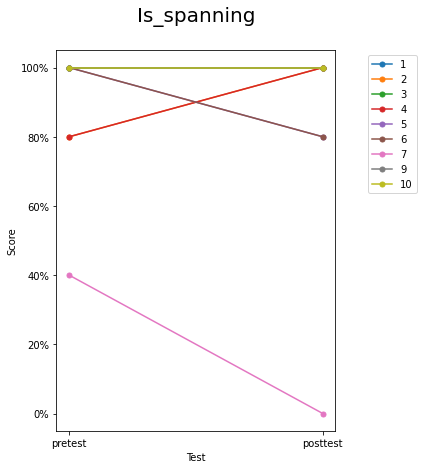

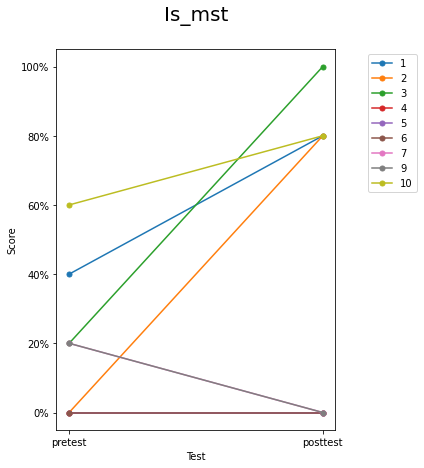

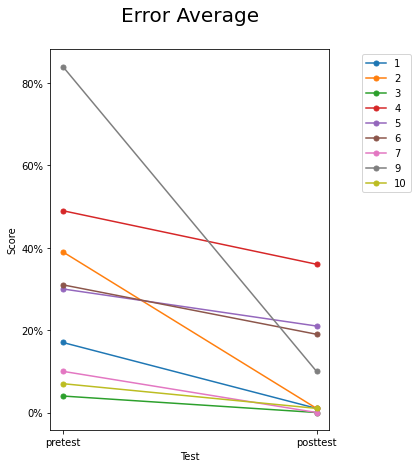

In [11]:
students = [1, 2, 3, 4, 5, 6, 7, 9, 10]

# graphing the pretest versus posttest is_spanning scores
fig, ax = plt.subplots(1, figsize=(5, 7))
for i in students:
    temp = spandf[spandf['student'] == i]
    plt.plot(temp.p_type, temp.value, marker='o', markersize=5)
plt.xlabel('Test')
plt.ylabel('Score')
plt.title('Is_spanning\n', loc='center', fontsize=20)

leg = plt.legend(students, loc='upper left', frameon=True)
# get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
# change to location of the legend
xOffset = 1.1
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform=ax.transAxes)

# set y axis ticks to percentages
yticks = plt.yticks()[0]
plt.yticks(yticks[1:-1], [str(round((i/5)*100)) + '%' for i in yticks[1:-1]])
plt.show()

# graphing the pretest versus posttest is_mst scores
fig, ax = plt.subplots(1, figsize=(5, 7))
for i in students:
    temp = mstdf[mstdf['student'] == i]
    plt.plot(temp.p_type, temp.value, marker='o', markersize=5)
plt.xlabel('Test')
plt.ylabel('Score')
plt.title('Is_mst\n', loc='center', fontsize=20)

leg = plt.legend(students, loc='upper left', frameon=True)
# get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
# change to location of the legend
xOffset = 1.1
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform=ax.transAxes)

# set y axis ticks to percentages
yticks = plt.yticks()[0]
plt.yticks(yticks[1:-1], [str(round((i/5)*100)) + '%' for i in yticks[1:-1]])
plt.show()

# graphing the pretest versus posttest spanning scores
fig, ax = plt.subplots(1, figsize=(5, 7))
for i in students:
    temp = errordf[errordf['student'] == i]
    plt.plot(temp.p_type, temp.value, marker='o', markersize=5)
plt.xlabel('Test')
plt.ylabel('Score')
plt.title('Error Average\n', loc='center', fontsize=20)

leg = plt.legend(students, loc='upper left', frameon=True)
# get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
# change to location of the legend
xOffset = 1.1
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform=ax.transAxes)

# set y axis ticks to percentages
yticks = plt.yticks()[0]
plt.yticks(yticks[1:-1], [str(round(i*100)) + '%' for i in yticks[1:-1]])
plt.show()